# Project: Investigate and analysis for "Marketing Funnel by Olist" dataset

<b>Data Link</b> :https://www.kaggle.com/datasets/olistbr/marketing-funnel-olist

<h3>About The Data</h3>

This is a marketing funnel dataset from sellers that filled-in requests of contact to sell their products on Olist Store. The dataset has information of 8k Marketing Qualified Leads (MQLs) that requested contact between Jun. 1st 2017 and Jun 1st 2018. They were randomly sampled from the total of MQLs.
<br><br>
<b>A seller join Olist through a marketing and sales funnel that was made public at this dataset. Description of steps:</b><br>

Sign-up at a landing page.
Get contacted by a Sales development Representative (SDR), confirm some information and schedule a consultancy.
Consultancy is made by a Sales Representative (SR). The SR may close the deal (lead sing up) or lose the deal (led leaves without sign in)
Lead becomes a seller and starts building his catalog on Olist.
His products are published on marketplaces and ready to sell!

## Questions for Analysis
1- Marketing channel effectiveness
<br>
2- Total Money Made By Each Channels in Thousand
<br>
3- Money Made By Marketing Channels in Thousand Over Time
<br>
4- Revenue Over Monthes in Thousand
<br>
5- Average Time until Buy
<br>
6- Sales Count Ber Month
<br>
7- Business Segment For Each Lead Profile
<br>
8- Who orders more ?
<br>
9- Who pays more ?
<br>
10- Which type makes more money ?

# Table of Contents
<ul>
<li><a href="#di">Data wrangling and cleaning</a></li>
<blockquote>
    <a href="#cdc">Working on "closed_deals" cleanig</a><br>
    <a href="#cdfl">"closed_deals" final look</a><br>
    <a href="#mqlc">"Working on "marketing_qualified_leads" cleanig</a><br>
    <a href="#mqlfl">"marketing_qualified_leads" final look</a>

  </blockquote>   
<li><a href="#dp">Data preparing for funnel analysis </a></li>
<li><a href="#eda">Exploratory data analysis </a></li>
<li><a href="#st">Markiting Funnel Report and Story </a></li>
</ul>

<a id='intro'></a>

<a id='di'></a>
### Data wrangling and cleaning  

<img src="https://media2.giphy.com/media/eMbKluW9vLGtFKI5JR/giphy.gif?cid=790b76115a267806e51ce17aa44eab93764caf217ee82620&rid=giphy.gif&ct=g
"/>

In [1]:
# Used libraries
import pandas as pd
import plotly.express as ex
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import seaborn as sns
sns.set_style('whitegrid', {'grid.linestyle': '--'})

%matplotlib inline

In [2]:
# Import The closed_deals, and marketing_qualified_leads Data

cd = pd.read_csv('closed_deals.csv')
mql = pd.read_csv('marketing_qualified_leads.csv')

<a id='cdc'></a>
# Working on "closed_deals" cleanig

In [3]:
cd.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [4]:
# Quick view on data

cd.info()
cd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

,declared_product_catalog_size,declared_monthly_revenue
count,69.000000,8.420000e+02
mean,233.028986,7.337768e+04
std,352.380558,1.744799e+06
min,1.000000,0.000000e+00
25%,30.000000,0.000000e+00
50%,100.000000,0.000000e+00
75%,300.000000,0.000000e+00
max,2000.000000,5.000000e+07


In [5]:
# Convert "won_date" column to date_time column

cd['won_date'] = pd.to_datetime(cd['won_date'])

In [6]:
# Drop unused columns

cd.drop(columns=['has_company','has_gtin','average_stock','declared_product_catalog_size','seller_id','sdr_id','sr_id']\
        ,axis=1 \
        ,inplace=True
       )

In [7]:
# Count the null values

cd.isnull().sum()

mql_id                        0
won_date                      0
business_segment              1
lead_type                     6
lead_behaviour_profile      177
business_type                10
declared_monthly_revenue      0
dtype: int64

In [8]:
# Fill null with "Unknown" 

cd.fillna('Unknown',inplace=True)

In [9]:
# No dublicated rows

cd.duplicated().sum()

0

In [10]:
# Check dublicated in each column

for i in cd.columns:
    print(i,cd[i].duplicated().sum())

mql_id 0
won_date 18
business_segment 808
lead_type 833
lead_behaviour_profile 832
business_type 838
declared_monthly_revenue 815


In [11]:
cd[['mql_id','won_date']].duplicated().sum()

0

<B>No duplicated full rows, or at the "mql_id" column and that's what we need

In [12]:
# Check structure error

for i in cd.columns[2:6]:
    print(i,'\n',cd[i].unique(),'\n'*2)

business_segment 
 ['pet' 'car_accessories' 'home_appliances' 'food_drink' 'health_beauty'
 'computers' 'household_utilities' 'construction_tools_house_garden'
 'toys' 'sports_leisure' 'stationery' 'food_supplement' 'home_decor'
 'bed_bath_table' 'watches' 'fashion_accessories' 'jewerly' 'party'
 'small_appliances' 'audio_video_electronics' 'other' 'bags_backpacks'
 'home_office_furniture' 'music_instruments' 'books' 'baby'
 'air_conditioning' 'phone_mobile' 'Unknown' 'handcrafted' 'perfume'
 'gifts' 'religious' 'games_consoles'] 


lead_type 
 ['online_medium' 'industry' 'online_big' 'online_small' 'offline'
 'online_top' 'online_beginner' 'other' 'Unknown'] 


lead_behaviour_profile 
 ['cat' 'eagle' 'Unknown' 'wolf' 'shark' 'cat, wolf' 'eagle, wolf'
 'shark, cat' 'eagle, cat' 'shark, wolf'] 


business_type 
 ['reseller' 'manufacturer' 'other' 'Unknown'] 




<b> No structre errors

<a id='cdfl'></a>
# "closed_deals" final look

In [13]:
cd.head()

,mql_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,2018-05-08 20:17:59,car_accessories,industry,eagle,reseller,0.0
2,327174d3648a2d047e8940d7d15204ca,2018-06-05 17:27:23,home_appliances,online_big,cat,reseller,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,2018-01-17 13:51:03,food_drink,online_small,Unknown,reseller,0.0
4,ffe640179b554e295c167a2f6be528e0,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,0.0


In [14]:
cd.info()
cd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mql_id                    842 non-null    object        
 1   won_date                  842 non-null    datetime64[ns]
 2   business_segment          842 non-null    object        
 3   lead_type                 842 non-null    object        
 4   lead_behaviour_profile    842 non-null    object        
 5   business_type             842 non-null    object        
 6   declared_monthly_revenue  842 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 46.2+ KB


,declared_monthly_revenue
count,8.420000e+02
mean,7.337768e+04
std,1.744799e+06
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,5.000000e+07


<a id='mqlc'></a>
# Working on "marketing_qualified_leads" cleanig

In [15]:
mql.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [16]:
mql.info()
mql.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,35dae000552fd88cce58a6571998738c,2018-05-02,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


In [17]:
# Convert "first_contact_date" column to date_time column

mql['first_contact_date'] = pd.to_datetime(mql['first_contact_date'])

In [18]:
# Fill null with "Unknown" 

mql.fillna('unknown',inplace=True)

In [19]:
# No dublicated rows

mql.duplicated().sum()

0

In [20]:
# Check dublicated in each column

for i in mql.columns:
    print(i,mql[i].duplicated().sum())

mql_id 0
first_contact_date 7664
landing_page_id 7505
origin 7990


In [21]:
mql[['mql_id','first_contact_date']].duplicated().sum()

0

<B>No duplicated full rows, or at the "mql_id" column and that's what we need

In [22]:
# Check structure error

mql.origin.unique()

array(['social', 'paid_search', 'organic_search', 'email', 'unknown',
       'referral', 'direct_traffic', 'display', 'other_publicities',
       'other'], dtype=object)

<b> No structre errors

<a id='mqlfl'></a>
# "marketing_qualified_leads" final look

In [23]:
mql.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [24]:
mql.info()
mql.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mql_id              8000 non-null   object        
 1   first_contact_date  8000 non-null   datetime64[ns]
 2   landing_page_id     8000 non-null   object        
 3   origin              8000 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 250.1+ KB


<ipython-input-24-eb103b451752>:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,8000
unique,8000,336,495,10
top,35dae000552fd88cce58a6571998738c,2018-05-02 00:00:00,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296
first,NaN,2017-06-14 00:00:00,NaN,NaN
last,NaN,2018-05-31 00:00:00,NaN,NaN


<a id='dp'></a>
# Data preparing for funnel analysis

In [25]:
# Merge the data to get the all market funnel data

df = mql.merge(cd,how="left", on ='mql_id')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mql_id                    8000 non-null   object        
 1   first_contact_date        8000 non-null   datetime64[ns]
 2   landing_page_id           8000 non-null   object        
 3   origin                    8000 non-null   object        
 4   won_date                  842 non-null    datetime64[ns]
 5   business_segment          842 non-null    object        
 6   lead_type                 842 non-null    object        
 7   lead_behaviour_profile    842 non-null    object        
 8   business_type             842 non-null    object        
 9   declared_monthly_revenue  842 non-null    float64       
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 687.5+ KB


,mql_id,first_contact_date,landing_page_id,origin,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaT,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaT,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaT,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaT,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0


In [26]:
# Convert the data to Monthes

df['won_date'] = pd.to_datetime(df["won_date"]).dt.strftime('%Y-%m')
df['first_contact_date'] = pd.to_datetime(df["first_contact_date"] ).dt.strftime('%Y-%m')

<a id='eda'></a>
# Exploratory data analysis 

# Marketing Channel Effectiveness

<img src="https://media2.giphy.com/media/y31rRE5h3wyPXey8vx/giphy.gif?cid=ecf05e47tyfles51nr6kpluybtefs5d01lwgaqf53oiprkyt&rid=giphy.gif&ct=g">

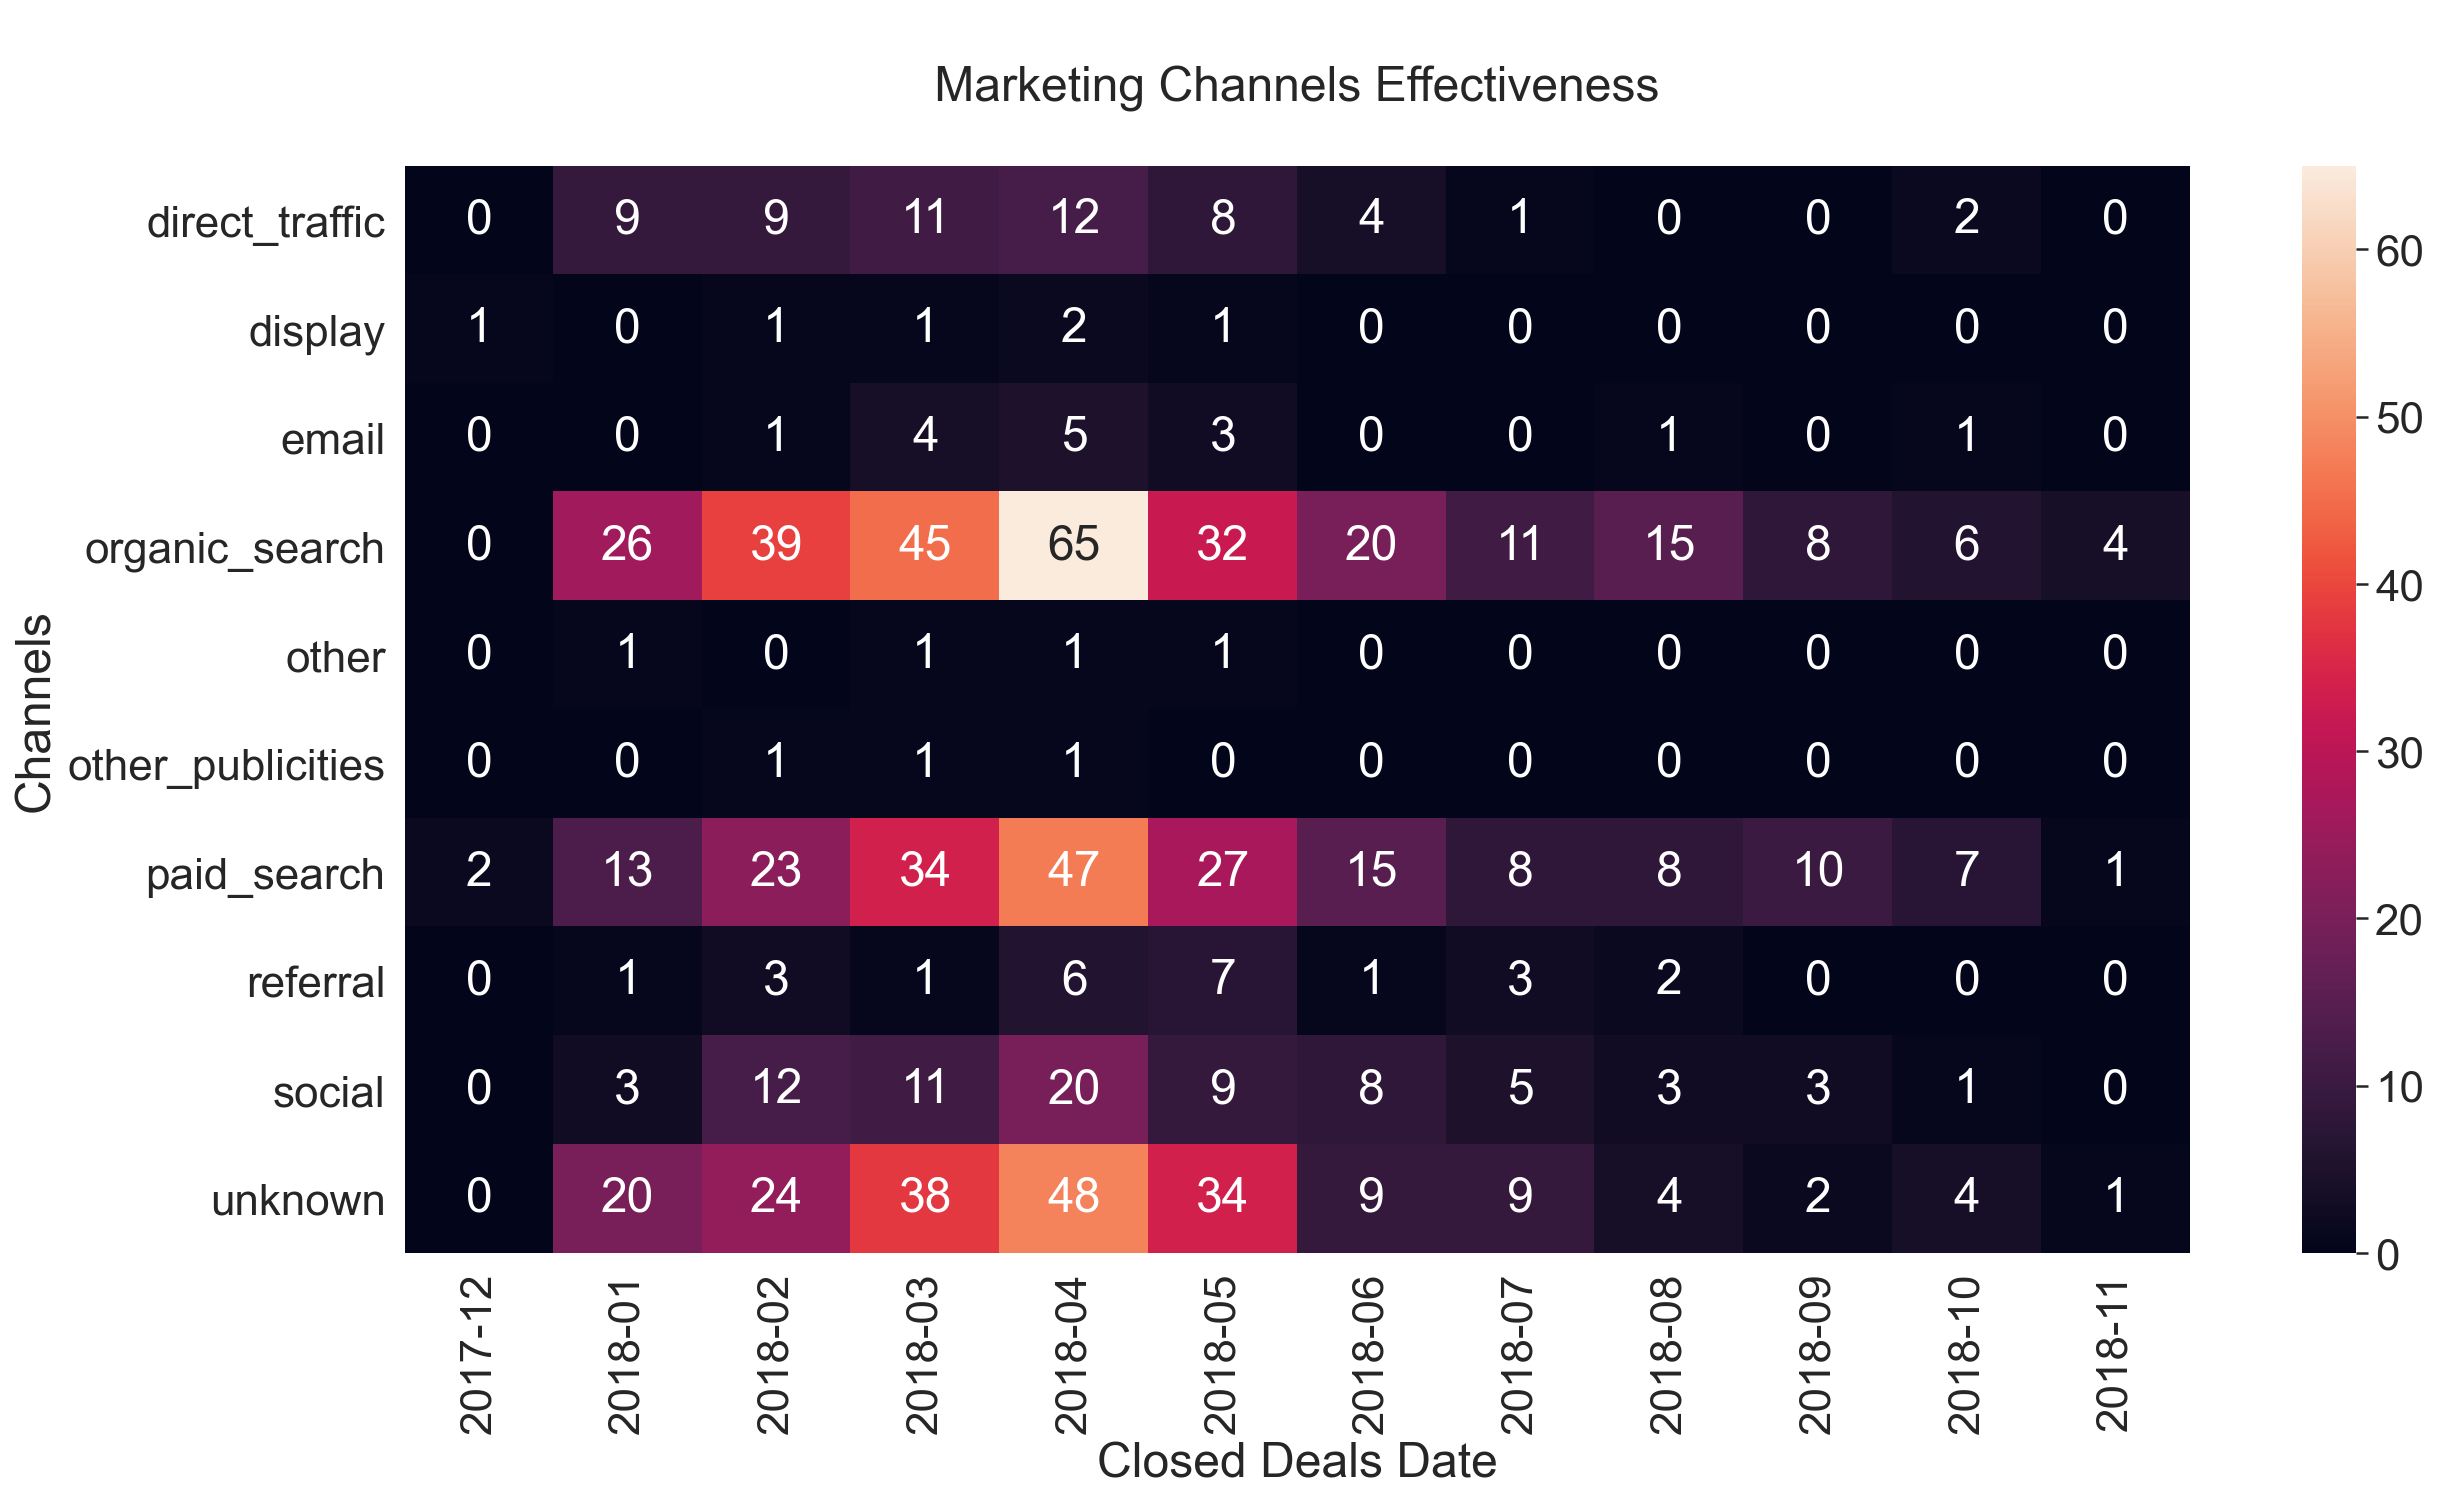

In [27]:
q1 = pd.pivot_table(df,
            index='origin',
            columns='won_date',
            values='declared_monthly_revenue',                            
            aggfunc='count',
            fill_value=0)

plt.figure(figsize=(20,10))
sns.set(font_scale=2);

sns.heatmap(q1, annot=True).set(title='\n Marketing Channels Effectiveness \n');

plt.xlabel("Closed Deals Date");
plt.ylabel("Channels");

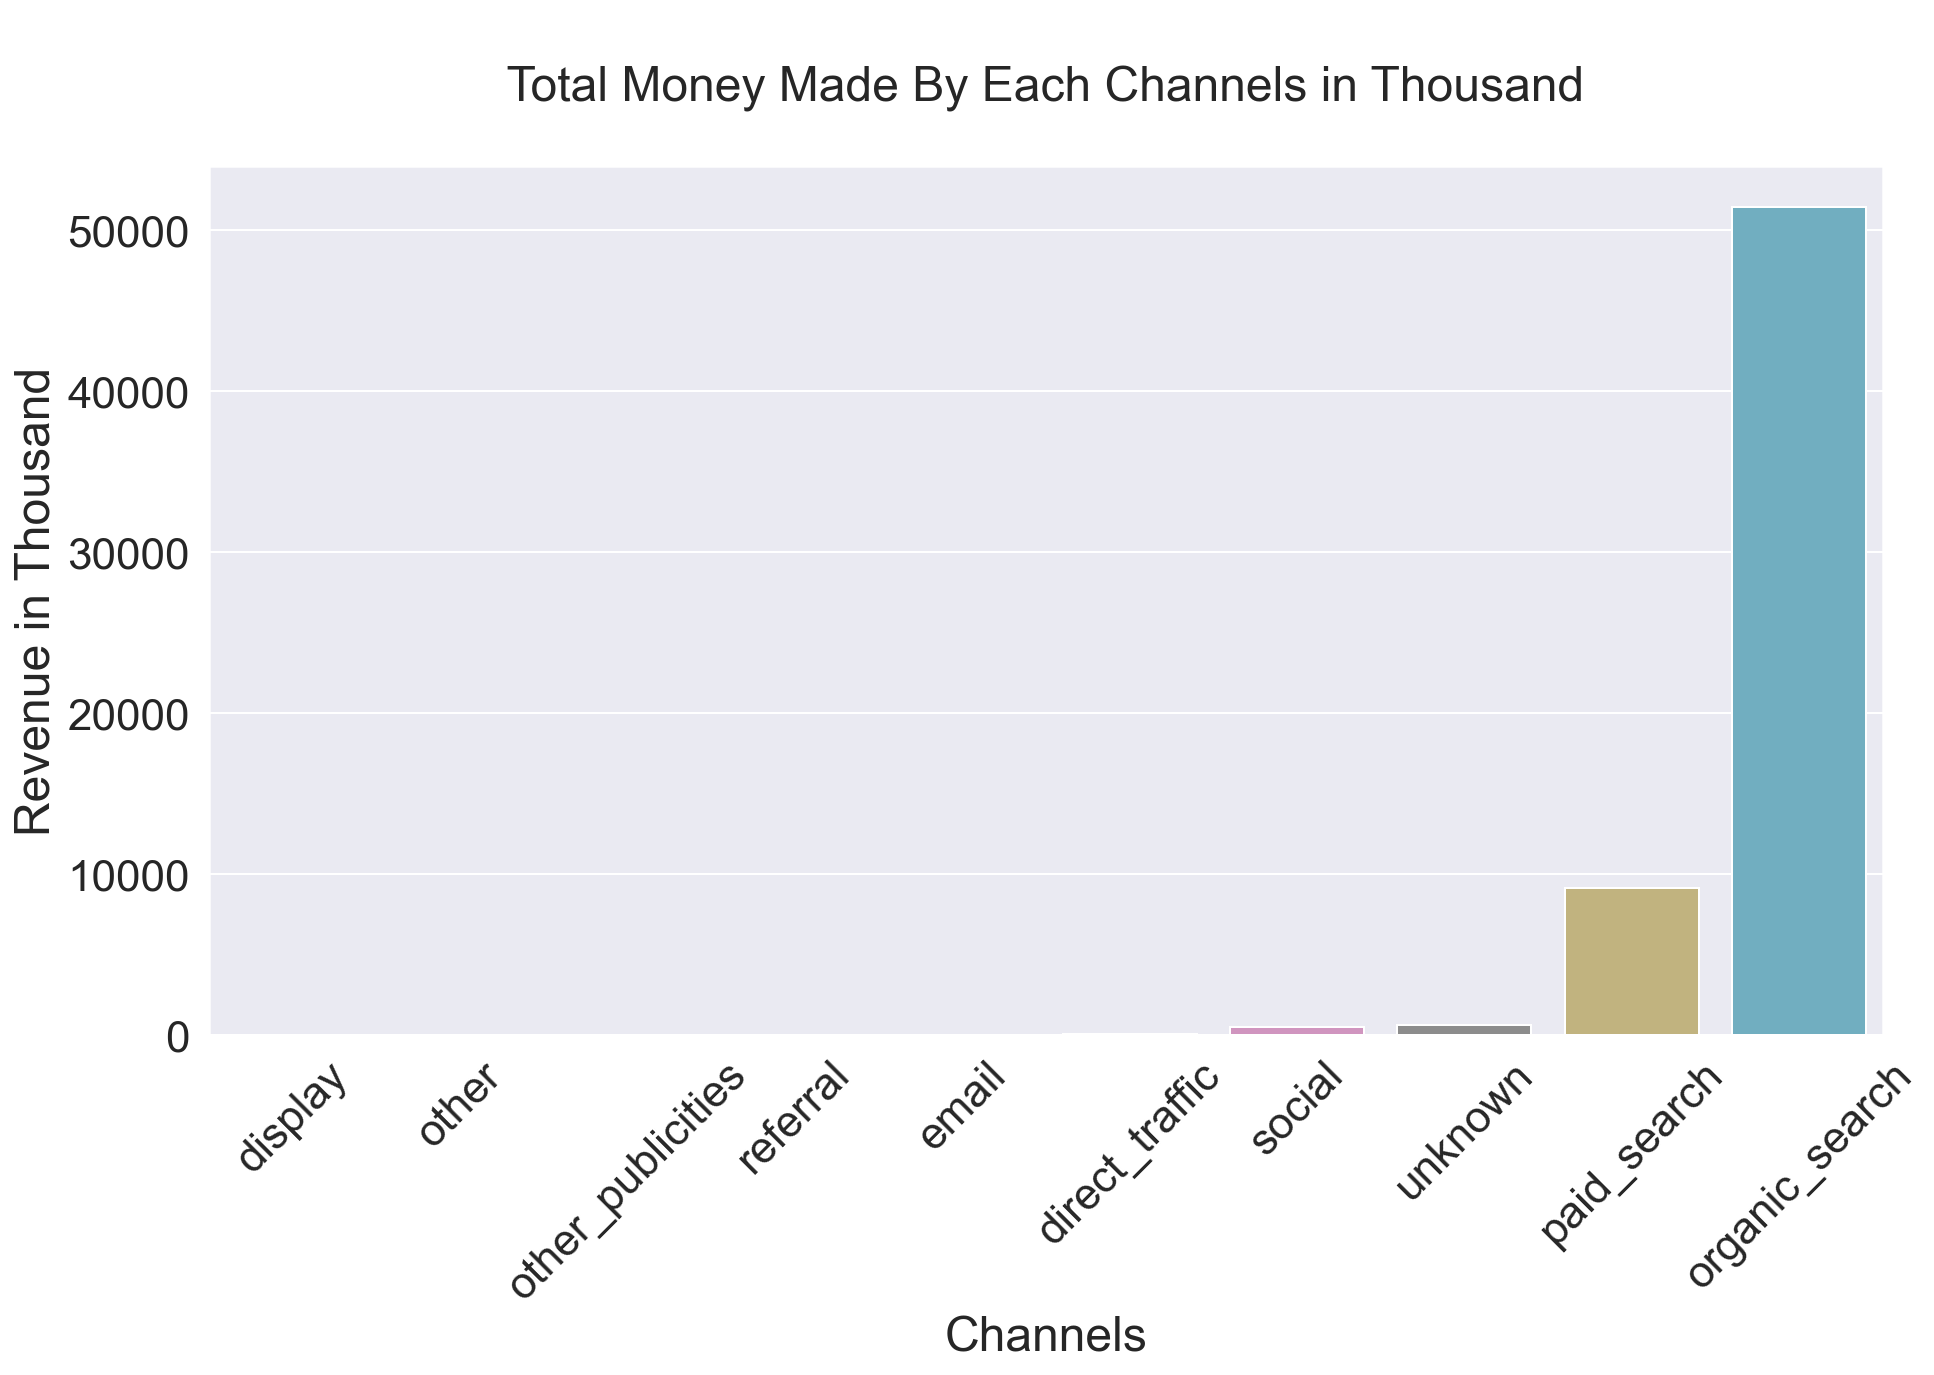

In [28]:
q2 = df.groupby('origin',as_index=False)["declared_monthly_revenue"].sum().\
                sort_values(by='declared_monthly_revenue')

q2['declared_monthly_revenue'] = q2['declared_monthly_revenue'] /1000

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)

sns.barplot(x='origin',
            y='declared_monthly_revenue',
            data=q2).set(title='\n Total Money Made By Each Channels in Thousand \n');

plt.ylabel("Revenue in Thousand");
plt.xlabel("Channels");

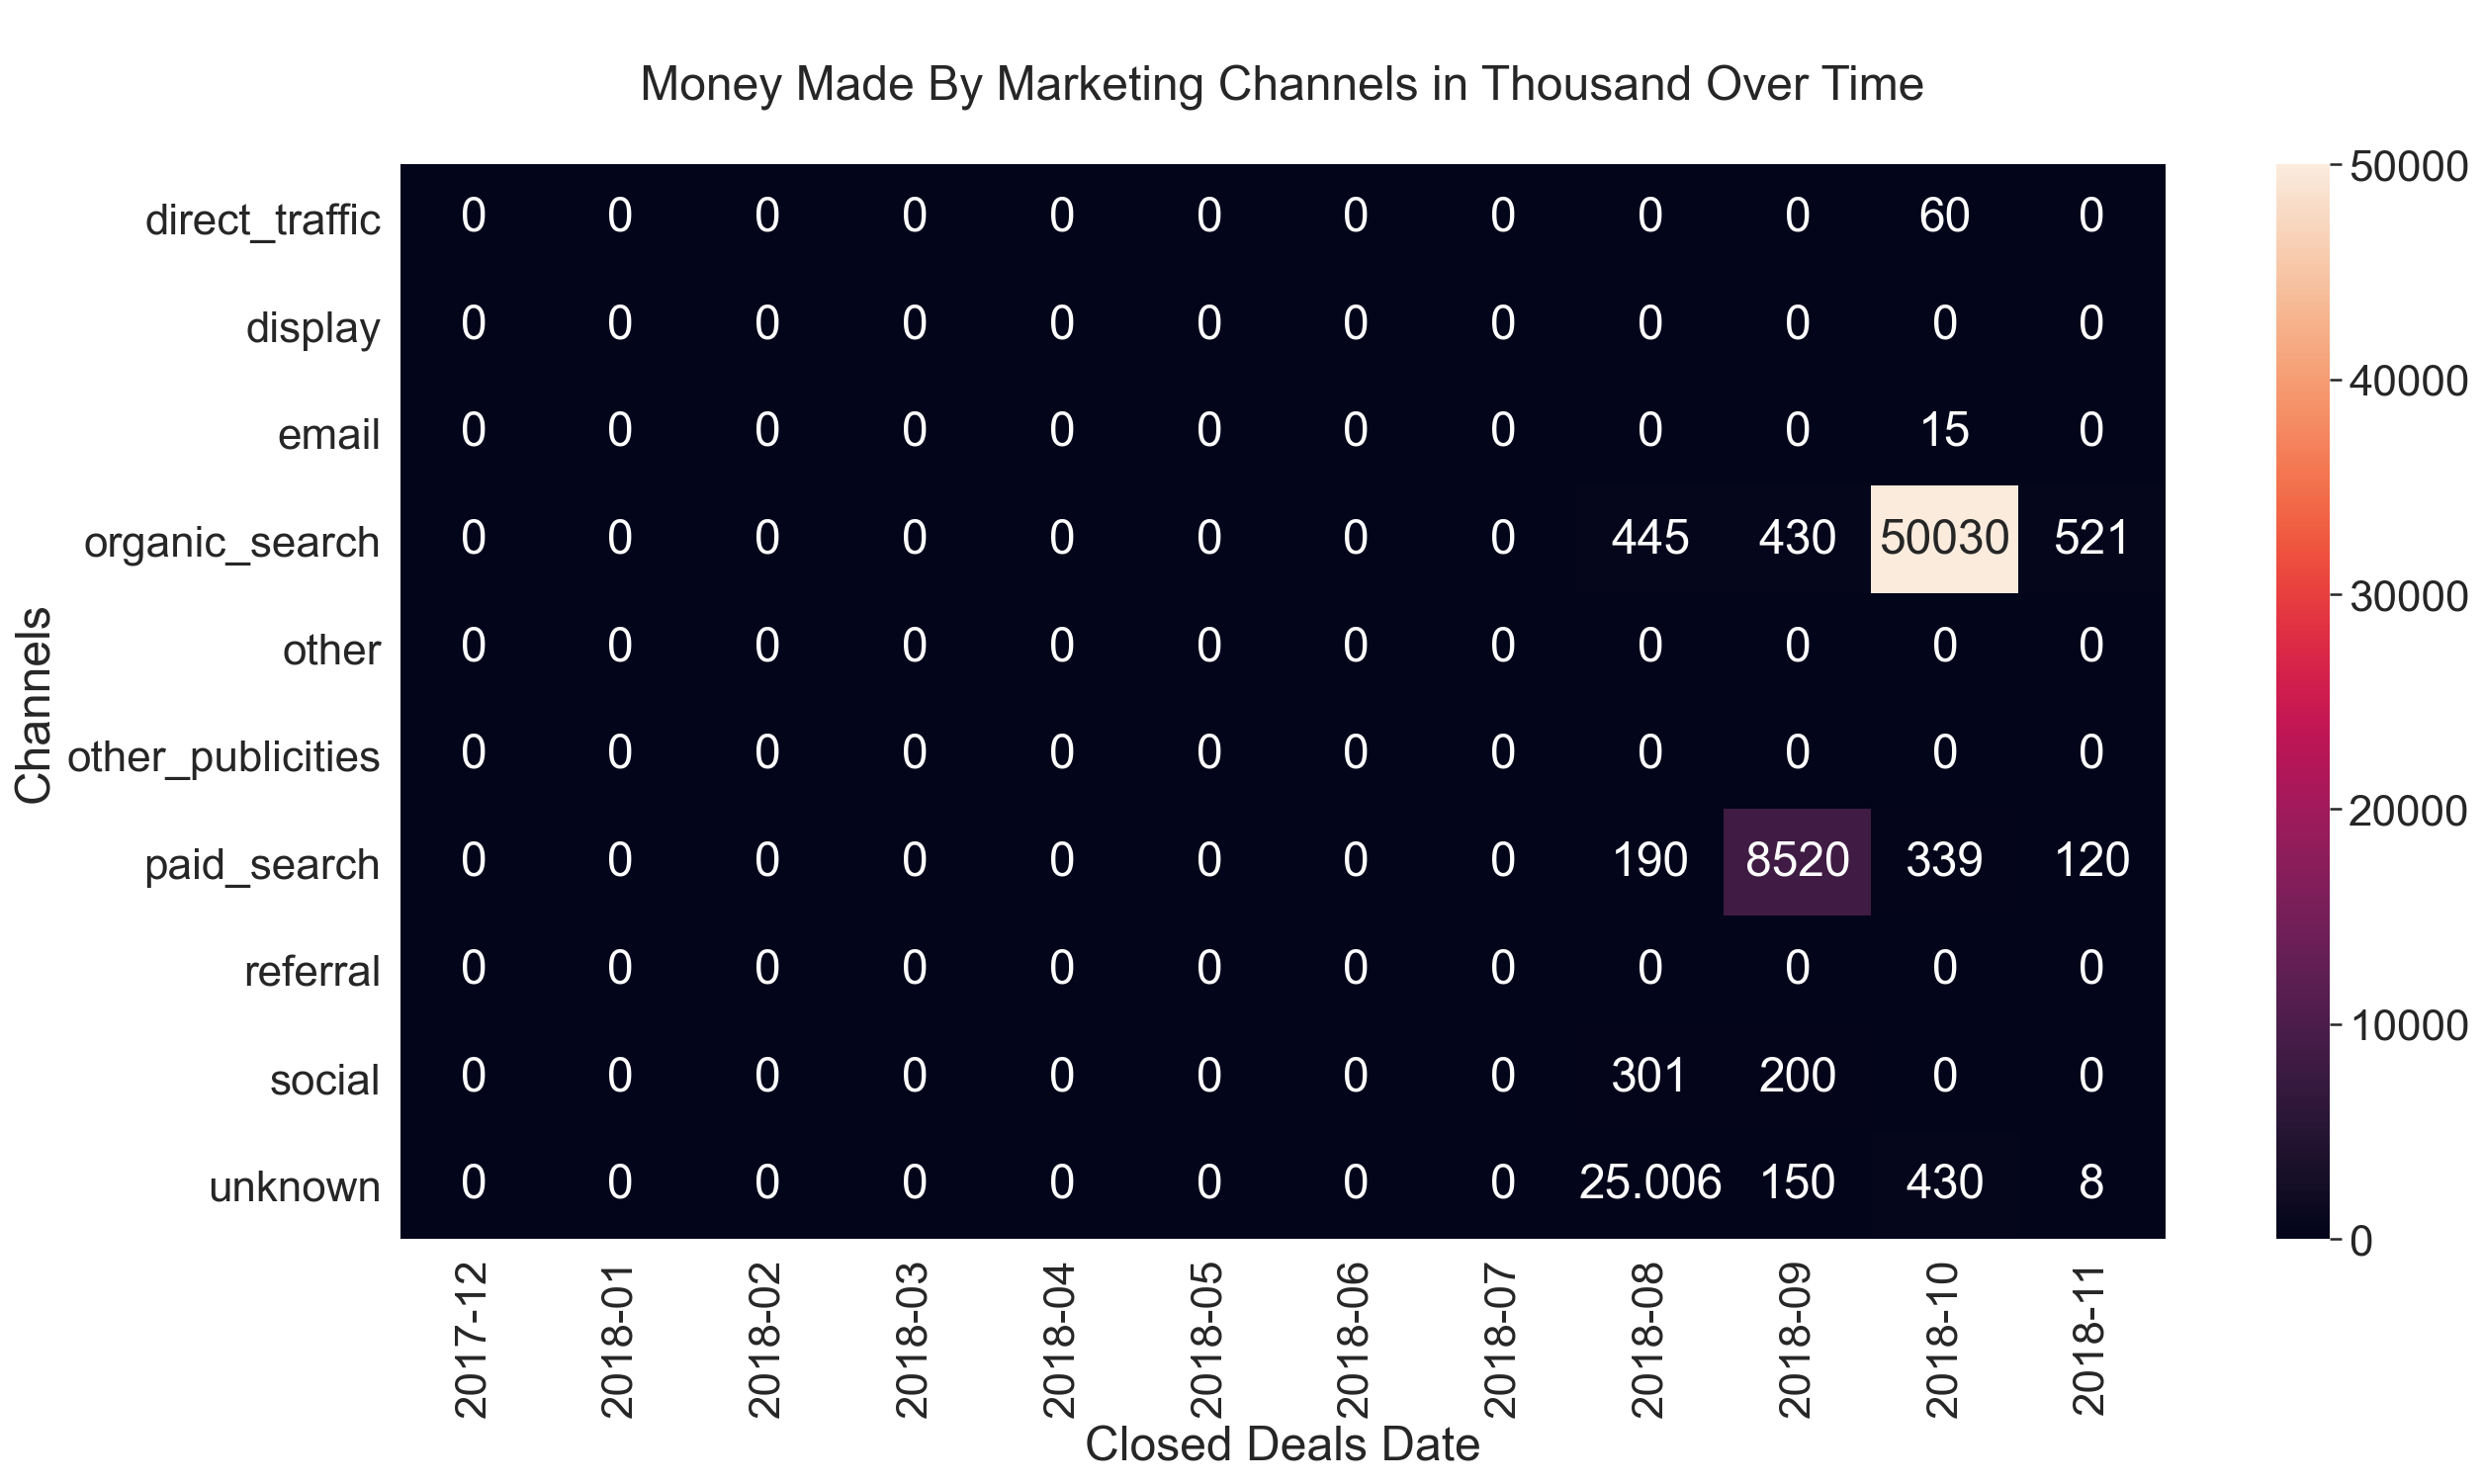

In [29]:
q3 = pd.pivot_table(df,
            index='origin',
            columns='won_date',
            values='declared_monthly_revenue',                            
            aggfunc='sum',
            fill_value=0)


plt.figure(figsize=(20,10));

sns.heatmap(q3/1000,
            annot=True,
            fmt='g',).set(title='\n Money Made By Marketing Channels in Thousand Over Time \n');

plt.xlabel("Closed Deals Date");
plt.ylabel("Channels");

<h3>Final Marketing Channel Effectiveness Result:</h3><br>
1- organic_search is the first channel that attract customers, and make money for the website<br>
2- paid_search is the second channel that attract customers, and make money for the website<br>


# Sales Performance Overview

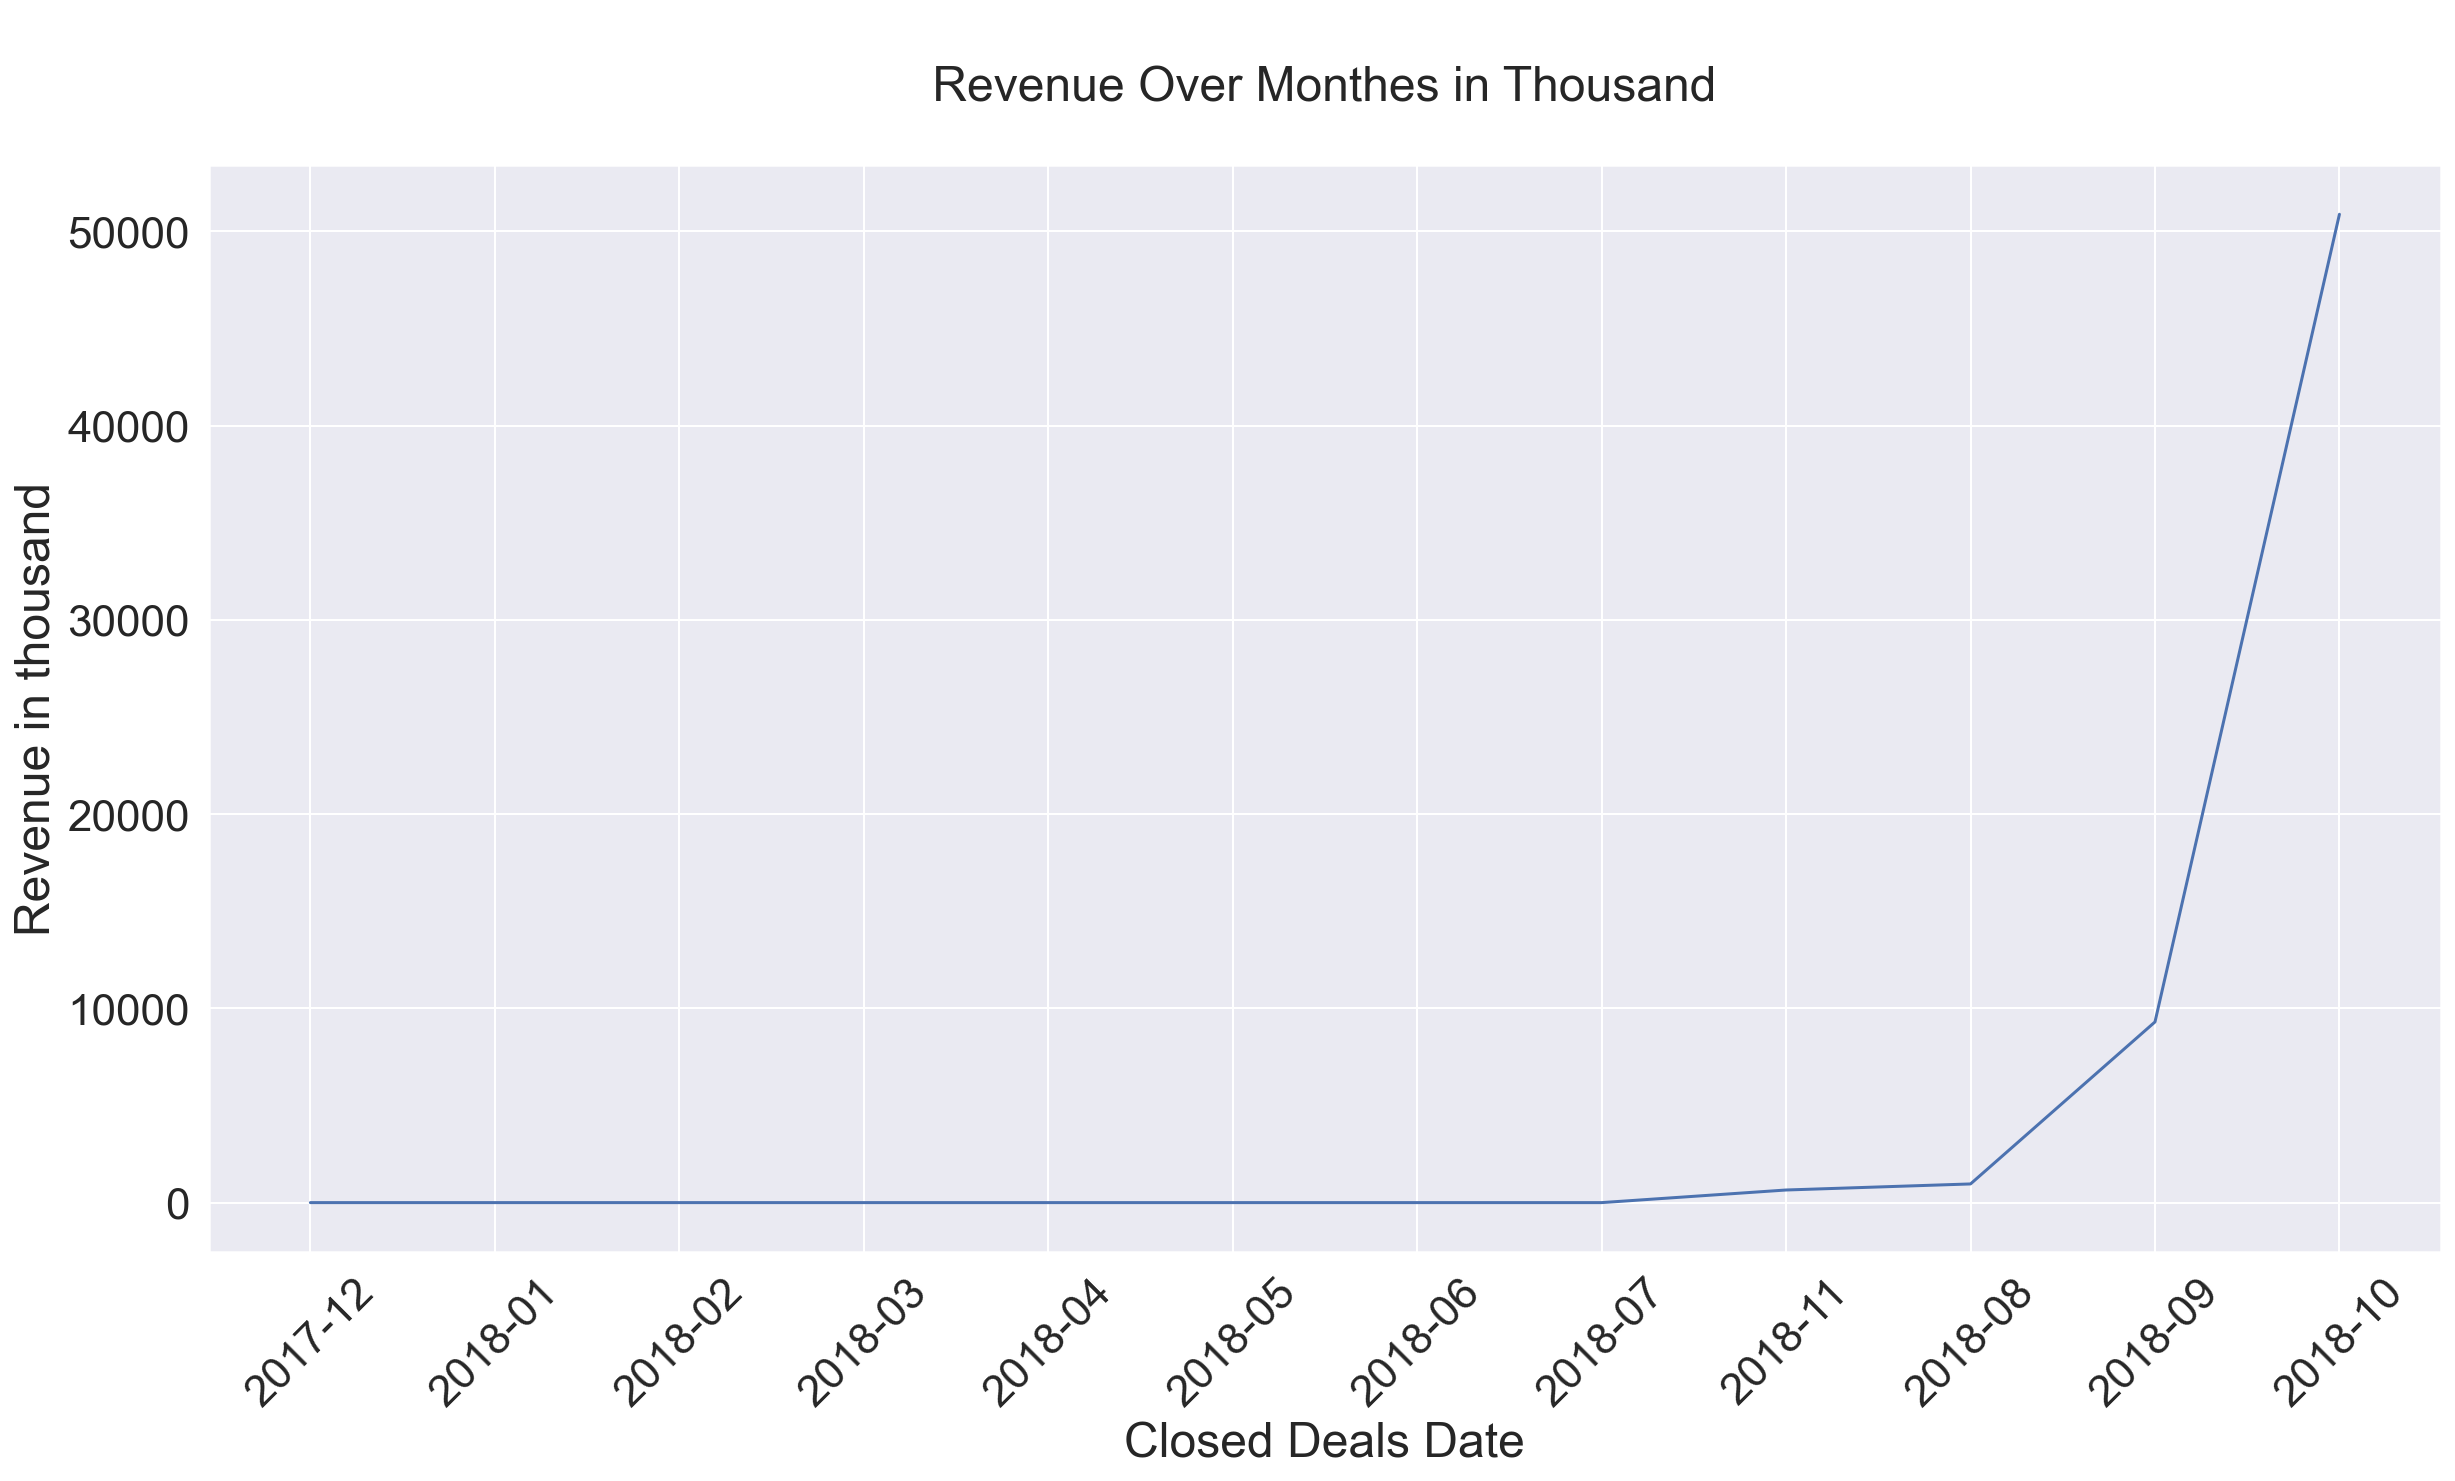

In [30]:
q4 = df.groupby('won_date',as_index=False)["declared_monthly_revenue"].sum().\
                sort_values(by='declared_monthly_revenue')

q4['declared_monthly_revenue'] = q4['declared_monthly_revenue'] /1000

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)

plt.xlabel("Closed Deals Date")
plt.ylabel("Revenue in thousand")

sns.lineplot(x='won_date',
             y='declared_monthly_revenue',
             data=q4).set(title='\n Revenue Over Monthes in Thousand \n');

In [31]:
df['dif']=(pd.to_datetime(df["won_date"]) - pd.to_datetime(df["first_contact_date"])).dt.days



 Average time between first sign up and buying = 47 Days


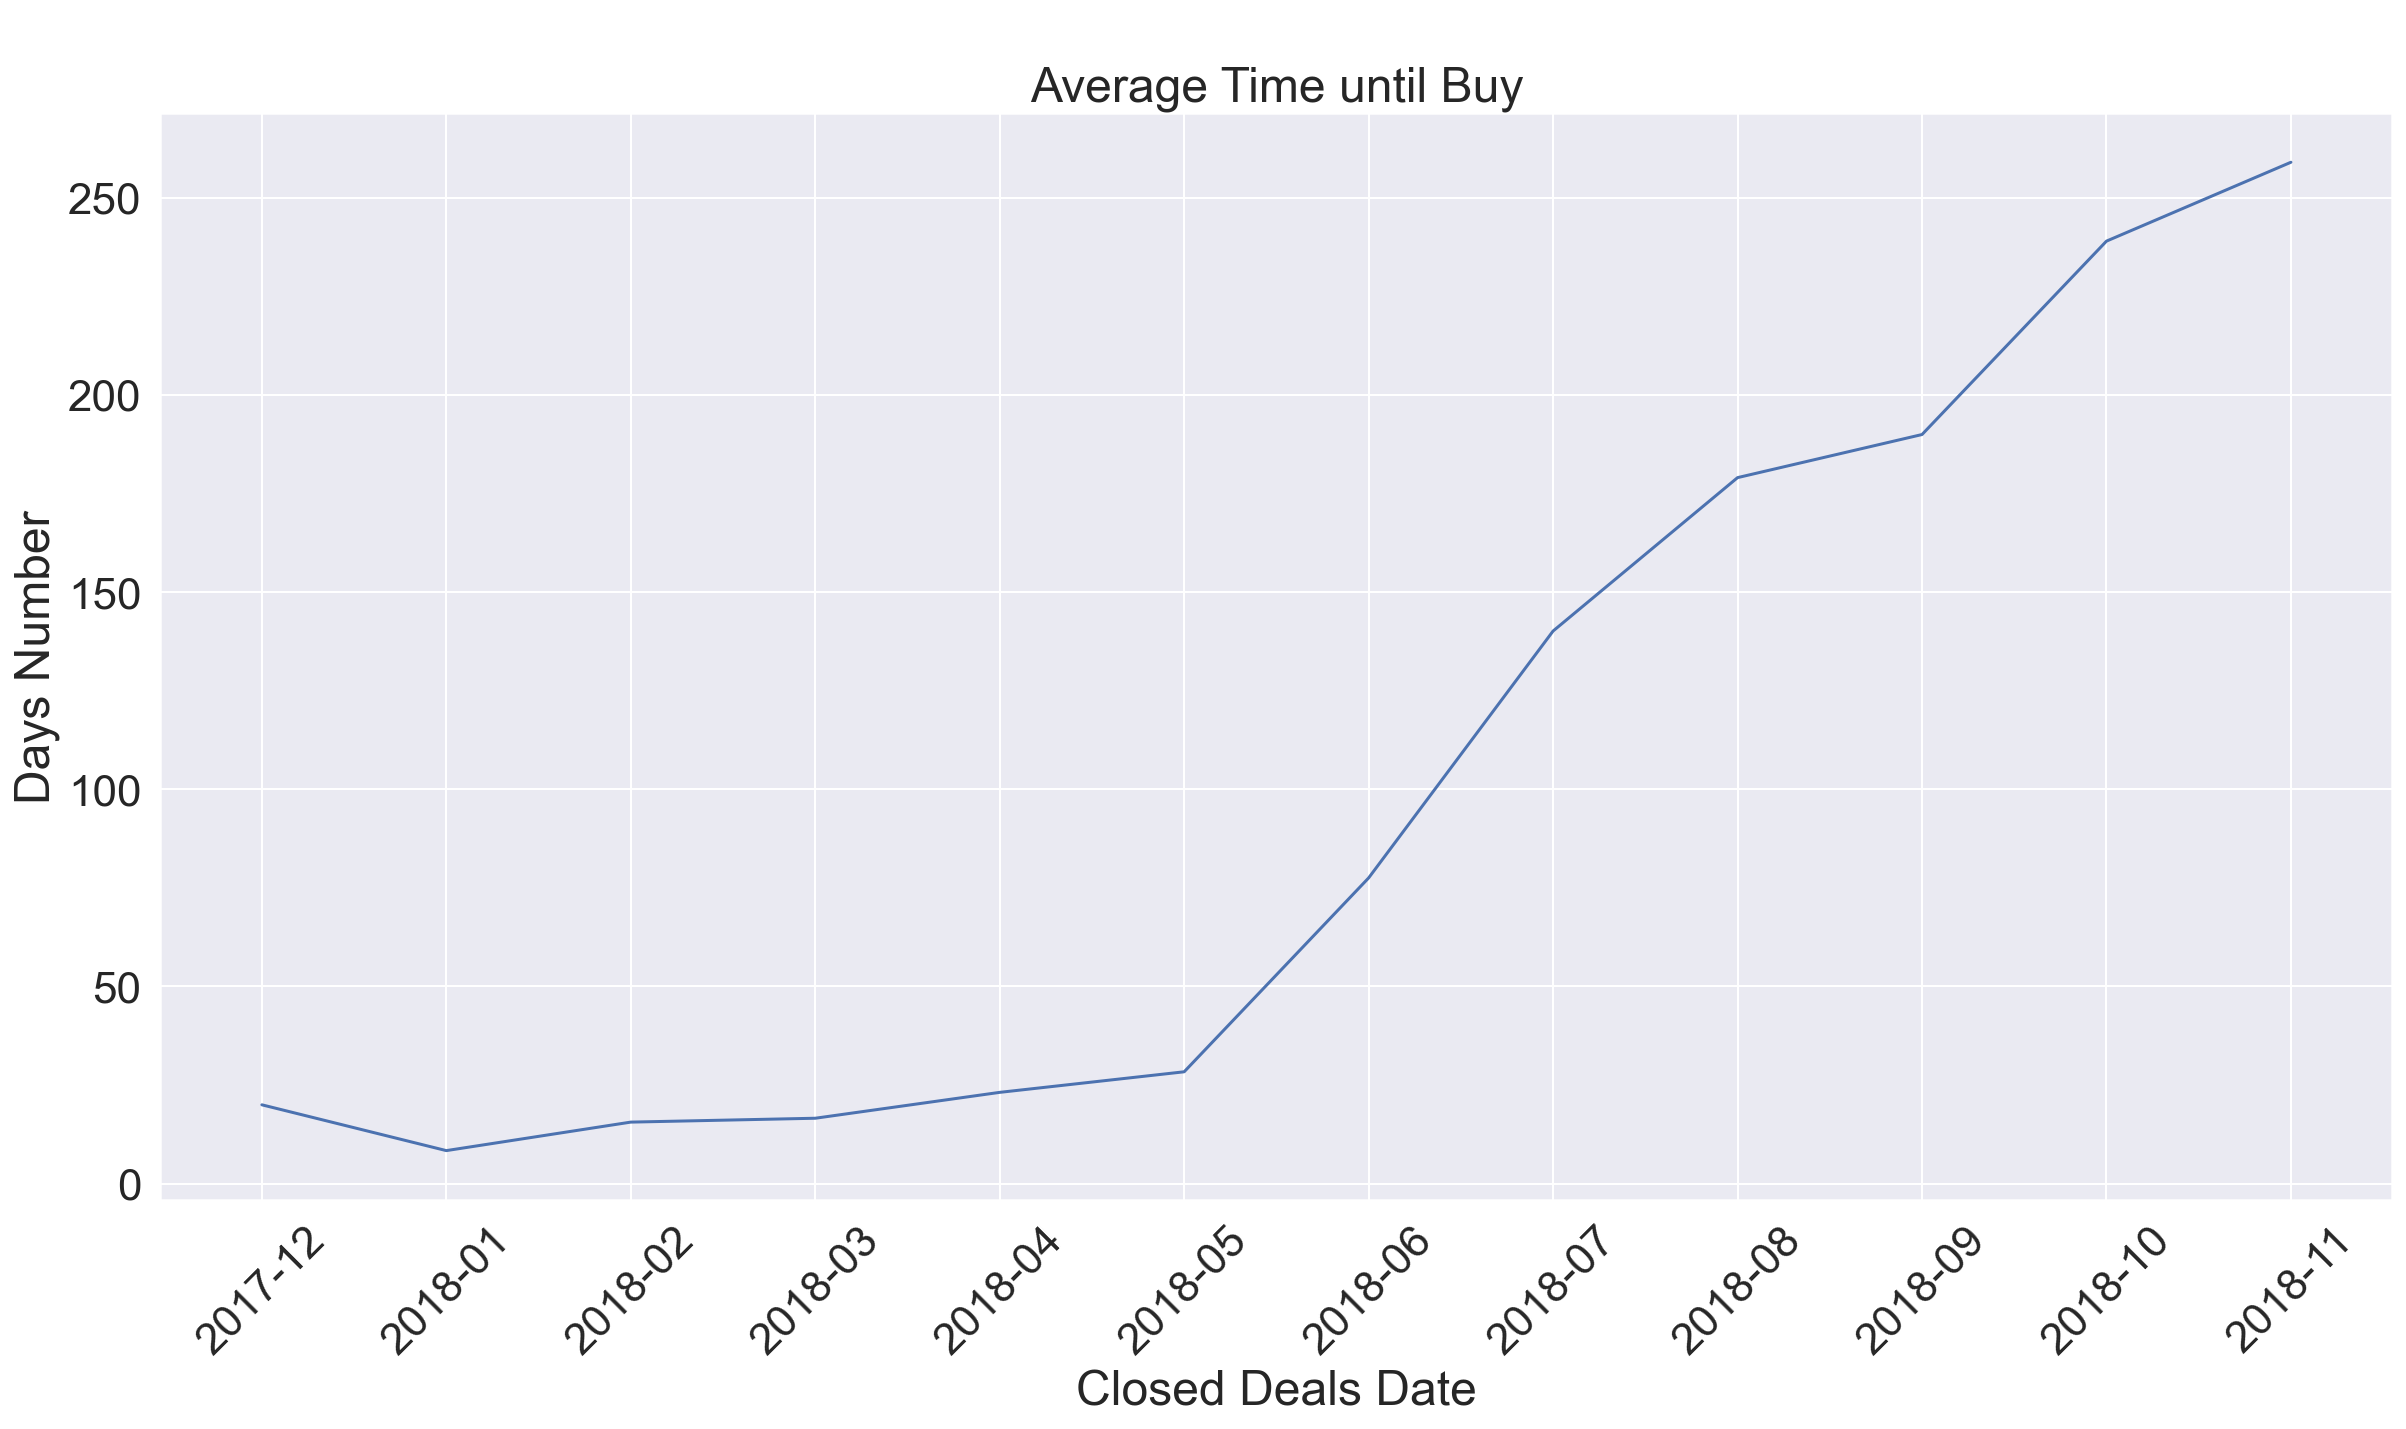

In [32]:
q5=df.groupby('won_date',as_index=False)['dif'].mean()

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)

plt.ylabel("Days Number")
plt.xlabel("Closed Deals Date")

sns.lineplot(x='won_date',
             y='dif',
             data=q5).set(title='\nAverage Time until Buy');

print('\n'*2,"Average time between first sign up and buying =", round(df['dif'].mean()),'Days')

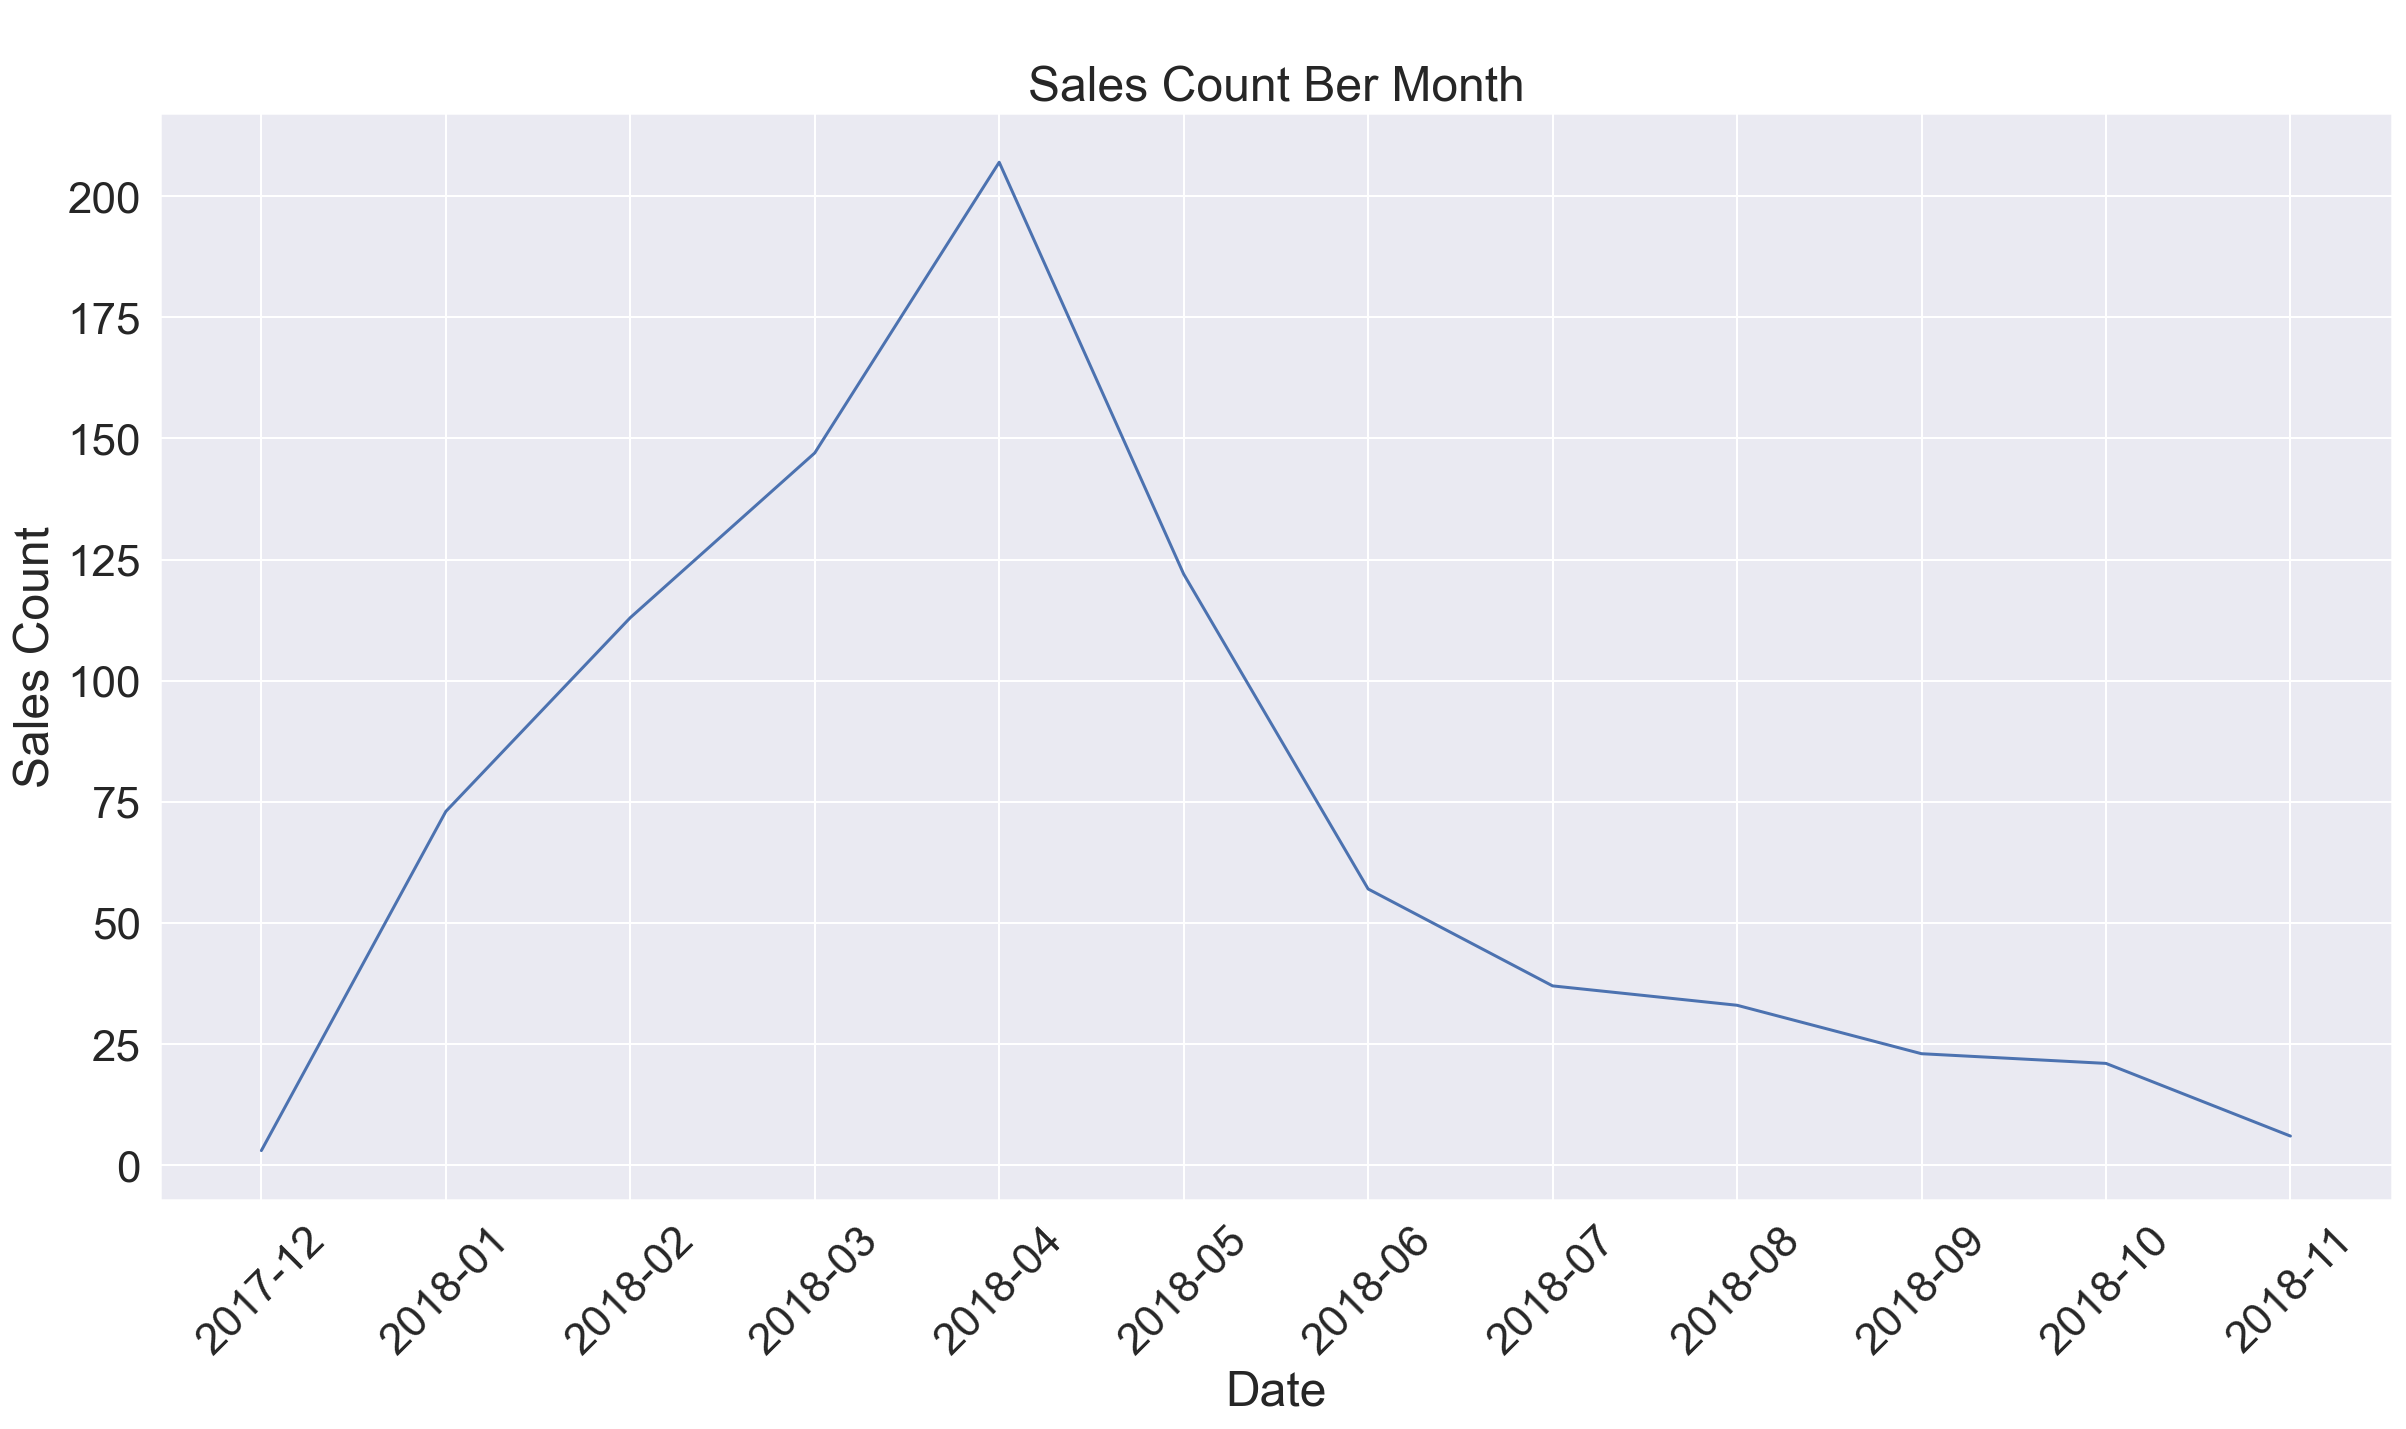

In [33]:
q6=df.groupby('won_date',as_index=False)['declared_monthly_revenue'].count()

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)

plt.ylabel("Sales Count")
plt.xlabel("Date")

sns.lineplot(x='won_date',
             y='declared_monthly_revenue',
             data=q6).set(title='\nSales Count Ber Month');

In [34]:
# Combine four types of mixed profiles(2.4%) into 'others'
profile_list = ['cat', 'eagle', 'wolf', 'shark']

df['lead_behaviour_profile'] = df.lead_behaviour_profile \
                                                      .map(lambda profile: profile
                                                           if profile in profile_list
                                                           else 'others')

In [35]:
q7 = df.groupby(['lead_behaviour_profile','business_segment'],as_index=False)\
                ['declared_monthly_revenue'].count()\
                                            .sort_values(by='declared_monthly_revenue')\
                .query('lead_behaviour_profile!="Unknown" and declared_monthly_revenue!=0')

ex.bar(q7, y ='declared_monthly_revenue',x='lead_behaviour_profile',
       barmode='group',color='business_segment',title ="Business Segment For Each Lead Profile" )\
        .update_layout(title_x=0.5,font=dict(family="moon heavy"))

<h3>Final Sales Performance Overview Result:</h3><br>
1- Revenue is growing in the last 3 months <br>
2- We can't make fast buyer customers because the gap between the sign-up and the closed deal is really wide last 5 month <br>
3- Number of sales is going down in the last 7 months<br>
<br>



# Closed Deal Performance Overview

In [36]:
q8 = cd.groupby('business_type',as_index=False)['declared_monthly_revenue'].count()

ex.pie(q8,names='business_type',values ='declared_monthly_revenue',
       title='Who orders more ?').update_layout(
                                               title_x=0.5,
                                               font=dict(family="moon heavy",size=20,))

In [37]:
q9 = cd.groupby('business_type',as_index=False)['declared_monthly_revenue'].sum()\
            .sort_values(by='declared_monthly_revenue')

ex.bar(q9,x='business_type',y ='declared_monthly_revenue',
       title='who pays more ?').update_layout(title_x=0.5,font=dict(family="moon heavy",size=20,))

In [38]:
q10 = cd.groupby('business_segment',as_index=False)['declared_monthly_revenue'].sum()\
            .sort_values(by='declared_monthly_revenue').query('declared_monthly_revenue!=0')

ex.bar(q10,y='business_segment',x ='declared_monthly_revenue',
       title='Which type makes more money ?',
       log_x=True).update_layout(title_x=0.5,font=dict(family="moon heavy",size=20))

<h3>Final Closed Deal Performance Overview Result:</h3><br>
<b>1- the reseller make more orders, but pay less money </b>
<br>
<b>2- the manufacturer make less orders, but pay more money</b>
<br><br>
<b>3.best-seller business segments:<br></b>
    <blockquote>
1.construction_tools_house_garden<br>
2.phone_mobile<br>
3.home_decor<br>
4.pet<br>
5.health_beauty<br>
    </blockquote>
<b>4- low-seller business segments:<br></b>
    <blockquote>
1.watches	<br>
2.food_drink<br>
3.perfume	<br>
4.party	<br>
5.bed_bath_table<br>
        </blockquote>



<a id='st'></a>
# Markiting Funnel Report and Story

<img src='https://media.giphy.com/media/XrwenGNux1GpYu25Qp/giphy.gif'>


<br> the organic search and paid search channels make the most traffic and the most money for the e-commerce website.<br>
this traffic is the lowest in the last 5 months, but it's the highest revenue over the last 5 months even though we can't engage fast customers.<br>
Most revenue comes from house garden tools, phones mobile, pets, and home decor, but on the other side watches, food and drink, perfume, and party tools don't make any notice revenue.
<br><br>
## In More Details


1- organic_search is the first channel that attract customers, and make more money for the website.<br>
2- paid_search is the second channel that attract customers, and make lower money for the website.
<br>




3- Revenue is growing in the last 3 months.<br>
4- We can't make fast buyer customers because the gap between the sign-up and the closed deal is really wide last 5 month.<br>
5- Number of sales is going down in the last 7 months.<br>



6- the reseller make more orders, but pay less money.<br>
7- the manufacturer make less orders, but pay more money.<br>

8.best-seller business segments:<br>
<blockquote>
	1.construction_tools_house_garden<br>
	2.phone_mobile<br>
	3.home_decor<br>
	4.pet<br>
	5.health_beauty
</blockquote>
9- low-seller business segments:
<blockquote>
	1.watches<br>
	2.food_drink<br>
	3.perfume<br>
	4.party<br>
	5.bed_bath_table
</blockquote>

<img style="display:inline; " src="https://media4.giphy.com/media/lQ6KHKqQaPrx7CBhPD/giphy.gif?cid=790b7611f9ec670f52232fd75b6b5273e13f44c70a07c032&rid=giphy.gif&ct=g" width="300" height="400">

<img style="display:inline" src="https://media2.giphy.com/media/BYoRqTmcgzHcL9TCy1/giphy.gif?cid=790b76117545874ff11cb1e1099fbc05dcbd5567b77a1735&rid=giphy.gif&ct=g"/>

<img style="display:inline; " src="https://media4.giphy.com/media/lQ6KHKqQaPrx7CBhPD/giphy.gif?cid=790b7611f9ec670f52232fd75b6b5273e13f44c70a07c032&rid=giphy.gif&ct=g" width="300" height="400">
